Altair is the best graphing software even made, but right now there's an open bug that prevents me from really recommending it to you. It's incredible, though, and the LA Times uses it a lot I think.

## Making charts of categorical vs. categorical data

Let's say we have some crimes that occur across different months.

In [1]:
import pandas as pd

# Your data might look like this
df = pd.DataFrame({
    'murder': [1, 2, 3],
    'theft': [4, 5, 4],
    'burglary': [6, 4, 3],
    'month': ['January', 'February', 'March'],
})
df

murder  theft  burglary     month
0       1      4         6   January
1       2      5         4  February
2       3      4         3     March

Most graphing software needs this to be long data, not wide data, so we'll melt it.

In [3]:
melted = df.melt(id_vars='month', var_name='crime_type', value_name='crime_count')
melted

month crime_type  crime_count
0   January     murder            1
1  February     murder            2
2     March     murder            3
3   January      theft            4
4  February      theft            5
5     March      theft            4
6   January   burglary            6
7  February   burglary            4
8     March   burglary            3

Now we can use altair to graph each point. Our X axis is going to be the month, and our Y axis is going to be the crime type. We'll use `crime_count` for the size of each circle.

**You'll need to `pip install vega` and `pip install altair` before this**

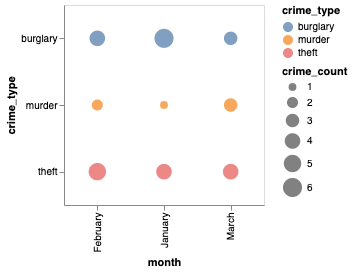

In [9]:
import altair as alt
alt.renderers.enable('notebook')

# https://altair-viz.github.io/gallery/index.html
chart = alt.Chart(melted, width=200, height=200).mark_circle().encode(
    x='month',
    y='crime_type',
    size='crime_count',
    color='crime_type'
)
chart

Now we can save it, too.

In [10]:
# https://altair-viz.github.io/user_guide/saving_charts.html
chart.save('chart.svg')